###  NumPy 배열 내 값을 검사, 조작하는 데 사용

- 마스킹
    - 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산 , 조작 시 사용

#### 예제 : 비온 날 세기

In [1]:
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

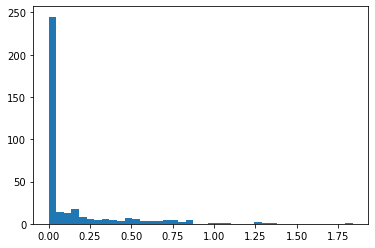

In [7]:
# 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(inches, 40)

#### ufunc으로서의 비교 연산자

In [10]:
import numpy as np
x=np.array([1,2,3,4,5])
x>3

array([False, False, False,  True,  True])

In [11]:
(2*x ) == (x**2)

array([False,  True, False, False, False])

#### 부울 배열로 작업하기

In [17]:
rng = np.random.RandomState(0)
x= rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

####  요소 개수 세기

In [18]:
# 6보다 작은 개수는?
np.count_nonzero(x<6)

8

In [19]:
np.any(x>8)

True

In [20]:
np.all(x<8)

False

In [21]:
# 각 행의 모든 값이 8보다 작은가?
np.all(x<8, axis=1)


array([ True, False,  True])

In [23]:
# 각 열의 모든 값이 8보다 작은가?
np.all(x<8, axis=0)

array([ True, False,  True,  True])

### 부울 연산자

In [26]:
# 비가 1인치보다 적게 내린 날이나, 0.5인치보다 많이 내린 날은??
np.sum((inches>0.5) & (inches<1))

29

In [28]:
print("Number days without rain", np.sum(inches==0))
print("Number days with rain", np.sum(inches!=0))
print("Days with more than 0.5 inches", np.sum(inches>0.5))
print("Rainy days with less than 0.2 inches", np.sum((inches<0.2) &(inches>0)))

Number days without rain 215
Number days with rain 150
Days with more than 0.5 inches 37
Rainy days with less than 0.2 inches 75


### 마스크로서의 부울 배열

In [32]:
# 5보다 작은 원소만 가져오기
print(x)
print("5보다 작은 원소들")
print(x[x<5])

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
5보다 작은 원소들
[0 3 3 3 2 4]


In [33]:
# 비가 온 날에 대한 마스크 생성
rainy = (inches>0)

# 여름에 해당하는 날에 대한 마스크 생성
summer = (np.arange(365) - 172 <90) & (np.arange(365)-172>0)
print("Median precip on rainy days in 2014(inches) :", np.median(inches[rainy]))

print("Median precip on Summer days in 2014(inches) :", np.median(inches[summer]))

print("Max precip on Summer days in 2014(inches) :", np.max(inches[summer]))

print("Median precip on non-Summer days in 2014(inches) :", np.median(inches[rainy & ~summer]))




Median precip on rainy days in 2014(inches) : 0.19488188976377951
Median precip on Summer days in 2014(inches) : 0.0
Max precip on Summer days in 2014(inches) : 0.8503937007874016
Median precip on non-Summer days in 2014(inches) : 0.20078740157480315
